# Galaxies classification CNN Model

## Import dataset

In [1]:

import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf


2022-02-08 16:14:21.699175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2022-02-08 16:14:21.699189: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import os.path
import pathlib

data_dir = pathlib.Path('../Datas/Images')
print(data_dir)
print(os.path.abspath(data_dir))
print(len(list(data_dir.glob('*/*'))))

../Datas/Images
/home/mattias/Documents/Travail/TPE/Galaxies-Classification-CNN/Datas/Images
50131


## Batch de Keras

In [3]:
batch_size = 20

### Train

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed=42,
    batch_size=batch_size,

)

Found 50131 files belonging to 2 classes.
Using 40105 files for training.


2022-02-08 16:14:23.913601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 16:14:23.913904: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2022-02-08 16:14:23.913952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64
2022-02-08 16:14:23.913986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_

In [5]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed=42,
    batch_size=batch_size,

)

Found 50131 files belonging to 2 classes.
Using 10026 files for validation.


In [6]:
class_names = val_data.class_names
print(class_names)

['ELLIPTICAL', 'SPIRAL']


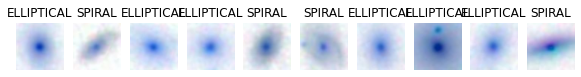

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(10):
        ax =plt.subplot(1, 10, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [19]:
logdir="logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, write_images=logdir,
                                                  embeddings_data=train_data)

In [20]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[tensorboard_callback]
)

Epoch 1/20


/home/mattias/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-02-08 16:24:50.934511: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655452160 exceeds 10% of free system memory.
2022-02-08 16:24:52.581041: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655452160 exceeds 10% of free system memory.


   1/2006 [..............................] - ETA: 1:31:19 - loss: 0.6931 - accuracy: 0.6000

2022-02-08 16:24:53.194733: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655452160 exceeds 10% of free system memory.
2022-02-08 16:24:54.860789: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655452160 exceeds 10% of free system memory.


   2/2006 [..............................] - ETA: 1:13:53 - loss: 0.6932 - accuracy: 0.5500

2022-02-08 16:24:55.406087: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655452160 exceeds 10% of free system memory.


  88/2006 [>.............................] - ETA: 1:21:00 - loss: 0.6906 - accuracy: 0.5511

KeyboardInterrupt: 